![head.png](https://github.com/iwh-halle/FinancialDataAnalytics/blob/master/figures/head.jpg?raw=1)

# Financial Data Analytics in Python

**Prof. Dr. Fabian Woebbeking**</br>
Assistant Professor of Financial Economics

IWH - Leibniz Institute for Economic Research</br>
MLU - Martin Luther University Halle-Wittenberg

fabian.woebbeking@iwh-halle.de

# Homework Assignment

You will need a Git/GitHub repository to submit your course deliverables. Consult [**slides.ipynb**](https://github.com/iwh-halle/FinancialDataAnalytics) for help with the tasks below! If you need further assistance, do not hesitate to open a Q&A at https://github.com/iwh-halle/FinancialDataAnalytics/discussions



## Part 1: Python basics

### Task:

1. Write a function that calculates the present value as

    $\text{PV}(C_t) = \frac{C_t}{(1+r)^t}$

2. Provide a docstring for the function.
3. Print the output for $C_{10} = 100$ and $r = 0.03$. Use string formatting to improve readability.

In [1]:
def present_value(C, r, t):
    """
    Calculate the present value of a cash flow.

    Parameters:
    C (float): The future cash flow.
    r (float): The discount rate.
    t (int): The time period in years.

    Returns:
    float: The present value of the cash flow.
    """
    return C / (1 + r) ** t

# Test the function with C {10} = 100 and r = 0.03
C = 100
r = 0.03
t = 10

pv = present_value(C, r, t)
print(f"The present value of $100 received in 10 years at a 3% discount rate is: ${pv:.2f}")

The present value of $100 received in 10 years at a 3% discount rate is: $74.41


### Task:

Plot $\text{PV}(C_t) = \frac{C_t}{(1+r)^t}$, with $C_{10} = 100$, as a function of $r$ for the interval 0 to 25%.

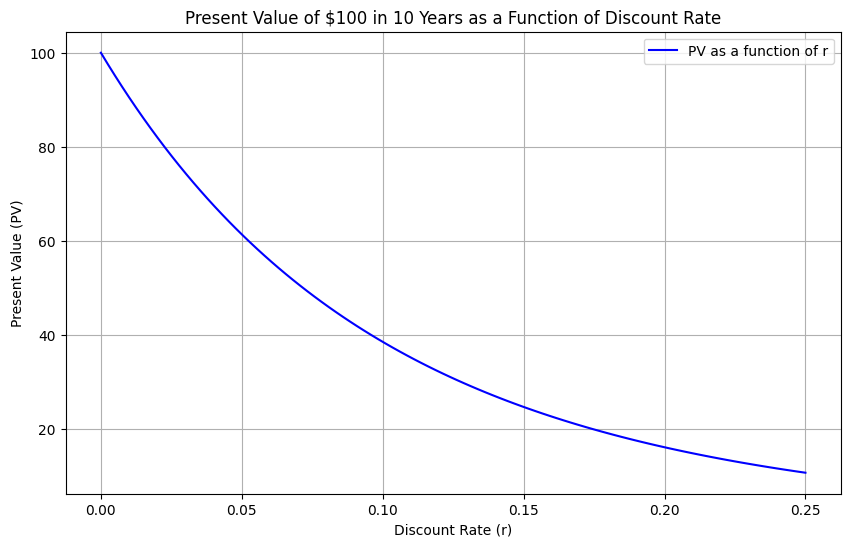

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the present value function
def present_value(C, r, t):
    """
    Calculate the present value of a cash flow.

    Parameters:
    C (float): The future cash flow.
    r (float): The discount rate.
    t (int): The time period in years.

    Returns:
    float: The present value of the cash flow.
    """
    return C / (1 + r) ** t

# Constants
C = 100  # Future cash flow
t = 10     # Time period in years

# Generate an array of discount rates from 0 to 0.25 (0% to 25%)
r_values = np.linspace(0, 0.25, 100)

# Calculate the present value for each discount rate
pv_values = [present_value(C, r, t) for r in r_values]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(r_values, pv_values, label='PV as a function of r', color='blue')
plt.xlabel('Discount Rate (r)')
plt.ylabel('Present Value (PV)')
plt.title('Present Value of $100 in 10 Years as a Function of Discount Rate')
plt.grid(True)
plt.legend()
plt.show()

### Task:

1. Use a loop to calculate the present value of $[10, 10, 110]$, these payments are made annually over the next three years. The interest rate is flat at $0.05$.
2. Print the discounted cash flow in a readable format.

In [4]:
def present_value(C, r, t):
    """
    Calculate the present value of a cash flow.

    Parameters:
    C (float): The future cash flow.
    r (float): The discount rate.
    t (int): The time period in years.

    Returns:
    float: The present value of the cash flow.
    """
    return C / (1 + r) ** t

# Given cash flows and interest rate
cash_flows = [10, 10, 110]  # Cash flows for each year
r = 0.05                    # Discount rate
total_pv = 0                # Initialize total present value

# Calculate the present value for each cash flow and sum them up
for t, C in enumerate(cash_flows, start=1):
    pv = present_value(C, r, t)
    total_pv += pv
    print(f"Year {t}: Cash Flow = ${C}, Present Value = ${pv:.2f}")

# Print the total present value of all cash flows
print(f"\nTotal Present Value of all cash flows: ${total_pv:.2f}")


Year 1: Cash Flow = $10, Present Value = $9.52
Year 2: Cash Flow = $10, Present Value = $9.07
Year 3: Cash Flow = $110, Present Value = $95.02

Total Present Value of all cash flows: $113.62


## Part 2: Working with data

In this assignment, you will work with financial data from a CSV file and use Python libraries such as NumPy, Pandas, Matplotlib and Seaborn to analyze and visualize the data. The data is stored in a file named 02_python_data.csv, which contains daily stock prices for various companies listed on Deutsche Börse (Xetra). The columns are labeled with Reuters identifier code (RIC). The first RIC '.GDAXI' is the german DAX index, the remaining RICs represent its constituents.

**Save all your visualizations as PNG files with "02_python_" as a prefix, e.g. "02_python_pricechart.png".**

In general, it is a useful practice to prefix output files with the name of the generating script.

### Task: 

1. Load the stock price data into a Pandas data frame called 'prices'.
2. Calculate both arithmetic as well as logarithmic returns for all assets. Store the return data in two separate data frames, named 'returns' and 'logreturns'. 
3. Display the first 5 rows of each data frame.

### Task:

1. Plot a histogram of DAX returns.
2. Plot both the prices as well as the returns of the DAX in one plot (you need two y axis).

Hint: 
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

### Task:

Which company had the highest average stock return during the time period covered by the data?

### Task:

Plot a [heat map](https://en.wikipedia.org/wiki/Heat_map) of the [correlations](https://en.wikipedia.org/wiki/Correlation) between the arithmetic returns of the first 10 assets (i.e. first 10 columns).

Hint:
* `returns.iloc[:10,:10]` see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html
* `returns.iloc[:10,:10].corr()` see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
* `sns.heatmap()` see https://seaborn.pydata.org/generated/seaborn.heatmap.html

### Task:

Considering all assets in the data, pick two pairs of stocks: 
1. the pair with the highest correlation and 
2. the pair with the lowest correlation. 
3. Create [scatter plots](https://en.wikipedia.org/wiki/Scatter_plot) for both pairs.

### Task:

1. Calculate the annualized [volatility](https://en.wikipedia.org/wiki/Volatility_(finance)) and [return](https://en.wikipedia.org/wiki/Rate_of_return) of each asset in the dataset. Assume there are 252 trading days in a year. (Use log-returns!)
2. Also calculate the [Sharpe ratio](https://en.wikipedia.org/wiki/Sharpe_ratio) for each asset, assuming a risk free rate of $0.5\%$ p.a..

### Task:

As you can see, we are using daily data so far. Re-sample the data to monthly frequency and plot monthly prices for 'BMWG.DE'.

Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html